In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [41]:
path = '../../output/weights/p_date=2022-11-02-11_18_42/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

63001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [42]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [43]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    #print(f"Moving Average (simple): {moving_average}")
    print()
    #print(f"Moving Average: {percent_list}")
    print("Values: " + " > ".join(map(str, moving_average.values())))
    
    print(f"Minimum: {min(data.values())}")

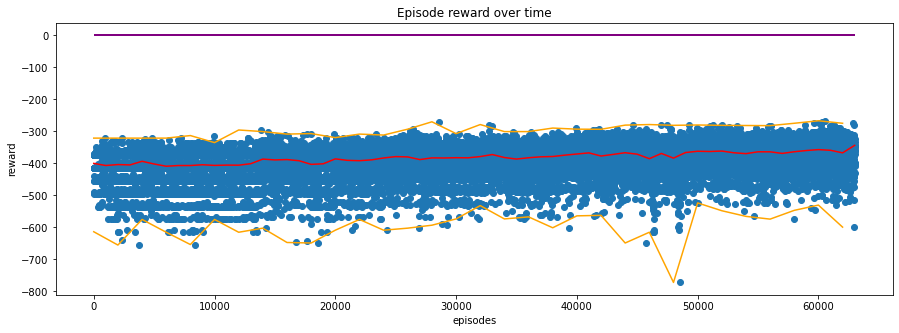

Maximum: -266.8
Average: -382.7880605069654

Values: -400.0 > -406.5 > -403.6 > -404.7 > -393.4 > -401.8 > -408.8 > -406.6 > -406.6 > -404.2 > -406.2 > -405.3 > -405.5 > -400.9 > -386.5 > -389.1 > -388.0 > -391.6 > -403.0 > -401.2 > -385.8 > -390.4 > -391.5 > -388.9 > -383.0 > -378.7 > -379.7 > -388.0 > -382.7 > -383.0 > -382.2 > -382.5 > -378.6 > -372.3 > -381.6 > -386.4 > -382.3 > -379.4 > -378.4 > -374.2 > -370.6 > -367.1 > -376.9 > -371.9 > -366.6 > -371.2 > -385.2 > -368.9 > -383.5 > -366.0 > -362.0 > -362.8 > -361.4 > -366.7 > -369.5 > -363.7 > -363.8 > -368.7 > -363.6 > -359.7 > -356.9 > -359.0 > -367.0 > -343.6
Minimum: -771.8


In [44]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

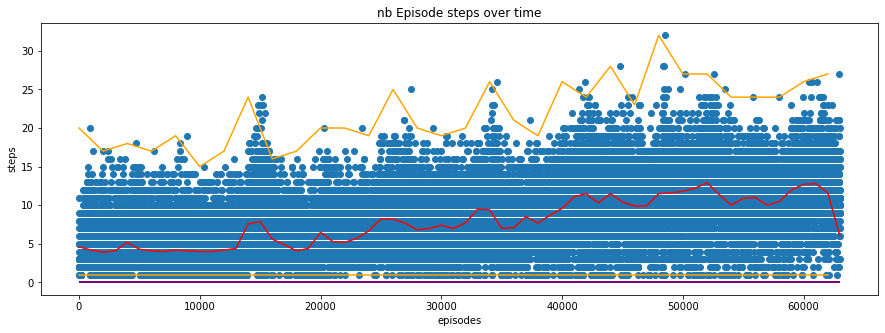

Maximum: 32
Average: 7.902144410406184

Values: 4.6 > 4.2 > 3.9 > 4.1 > 5.2 > 4.3 > 4.1 > 4.0 > 4.2 > 4.1 > 4.0 > 4.0 > 4.2 > 4.4 > 7.6 > 7.9 > 5.6 > 4.9 > 4.1 > 4.4 > 6.5 > 5.3 > 5.2 > 5.7 > 6.7 > 8.2 > 8.2 > 7.7 > 6.8 > 7.0 > 7.4 > 7.0 > 7.7 > 9.5 > 9.4 > 7.0 > 7.1 > 8.5 > 7.7 > 8.7 > 9.6 > 11.1 > 11.5 > 10.3 > 11.5 > 10.4 > 9.9 > 9.9 > 11.5 > 11.6 > 11.8 > 12.2 > 12.9 > 11.4 > 10.0 > 10.9 > 11.0 > 10.0 > 10.5 > 12.0 > 12.7 > 12.8 > 11.6 > 6
Minimum: 1


In [45]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

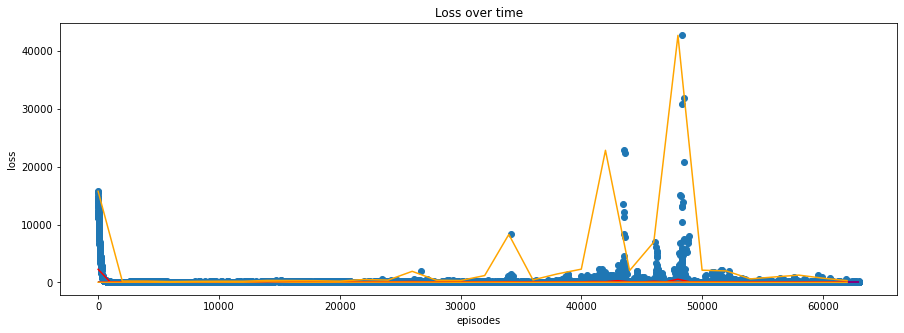

Maximum: 42736.7109375
Average: 147.44445729804622

Values: 2273.3 > 81.4 > 97.8 > 120.6 > 141.5 > 122.5 > 73.7 > 66.2 > 96.5 > 111.4 > 100.2 > 102.5 > 114.3 > 112.4 > 205.3 > 215.8 > 154.0 > 109.9 > 87.8 > 97.9 > 121.3 > 95.2 > 95.7 > 101.8 > 114.5 > 132.0 > 153.5 > 120.1 > 99.2 > 105.2 > 101.0 > 92.2 > 92.2 > 122.8 > 127.6 > 72.9 > 71.3 > 83.9 > 100.8 > 86.7 > 108.1 > 160.0 > 129.1 > 301.3 > 112.5 > 93.1 > 193.9 > 102.0 > 554.3 > 97.6 > 95.7 > 113.1 > 99.3 > 74.7 > 58.1 > 62.9 > 59.0 > 52.6 > 47.0 > 53.9 > 53.3 > 49.6 > 40.0
Minimum: 16.054683685302734


In [46]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

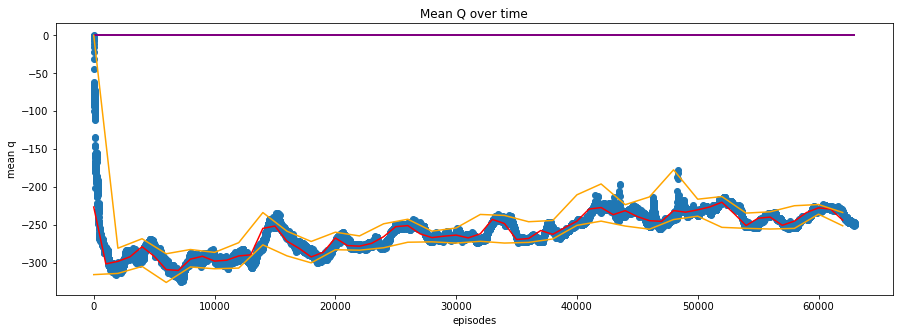

Maximum: 0.02815391081902716
Average: -259.96648662034016

Values: -226.2 > -301.1 > -297.8 > -291.8 > -278.5 > -291.0 > -308.7 > -309.8 > -294.9 > -291.1 > -297.5 > -296.3 > -290.7 > -289.2 > -254.3 > -251.3 > -271.3 > -280.7 > -292.0 > -285.8 > -267.0 > -277.0 > -277.8 > -274.1 > -265.3 > -252.1 > -250.7 > -261.4 > -266.5 > -264.6 > -263.2 > -266.9 > -261.5 > -242.5 > -248.0 > -269.0 > -267.7 > -257.2 > -262.2 > -253.3 > -244.8 > -228.9 > -226.9 > -236.3 > -231.0 > -238.8 > -244.2 > -245.1 > -230.9 > -233.0 > -229.9 > -226.1 > -219.9 > -234.7 > -250.6 > -241.0 > -239.5 > -250.3 > -244.8 > -233.5 > -227.3 > -228.9 > -243.5
Minimum: -325.60693359375


In [47]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [48]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [54]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")